## Nataf class and transformation of points which mean value is greater than 1e04.

In this notebook will be verified the correct Nataf transformation of sets of points with mean values greater than $1e04$: it has been noticed that some problems exist when the direct transformation is applied to the pressure points set, which mean values have been set to $1e06$ and $5e05$ Pa.


### Part 1: Plot of points inside the old version of script.
In this section will be proposed the plots of the correlated and uncorrelated sets of points (both using Quadrature rule and Monte Carlo sampling method) in the older version of the script: the comparison of the mapped points shows discrepancies between the expected values of mean of pressures, infact once they have been mapped, a new value of mean value is reached ($\mu = 0$ both for $P_1$ and $P_2$).

The Cholesky decomposition of fictive matrix R0 is:
[[1.        0.        0.        0.       ]
 [0.3       0.9539392 0.        0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.6       0.8      ]]
The fictive matrix is:
[[1.  0.3 0.  0. ]
 [0.3 1.  0.  0. ]
 [0.  0.  1.  0.6]
 [0.  0.  0.6 1. ]]


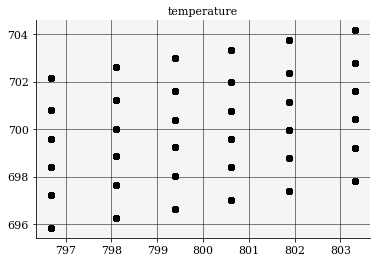

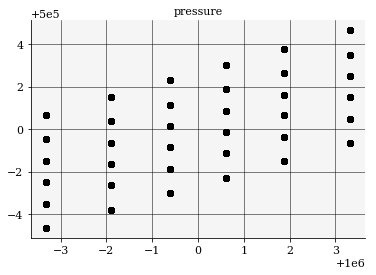

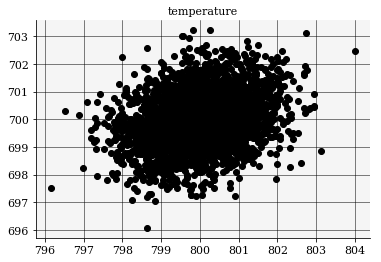

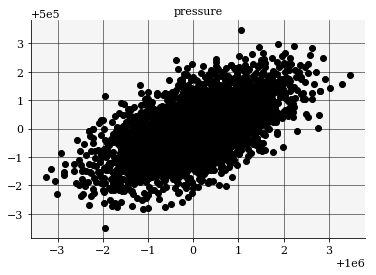

In [2]:
%matplotlib inline
import numpy as np
from equadratures import *
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

gamma = 1.4
T01   = 800.
T02   = 700.
P01   = 10*10**5
P02   = 5*10**5
t1 = Parameter(order=5, distribution='truncated-gaussian', shape_parameter_A= T01, shape_parameter_B=1.0, upper = T01*1.1, lower = T01*0.95)
t2 = Parameter(order=5, distribution='truncated-gaussian', shape_parameter_A= T02, shape_parameter_B=1.0, upper = T02*1.1, lower = T02*0.95)
p1 = Parameter(order=5, distribution='truncated-gaussian', shape_parameter_A= P01, shape_parameter_B=1.0, lower = P01*0.90, upper = P01*1.1)
p2 = Parameter(order=5, distribution='truncated-gaussian', shape_parameter_A= P02, shape_parameter_B=1.0, lower = P02*0.90, upper = P02*1.1)

# POLYNOMIAL CONSTRUCTION
#
#---------------------------------------------------------------------------------------------------------------------
# Construct a polynomial in the uncorrelated normal space
myBasis = Basis('Tensor grid')
normal = Parameter(order=5, distribution='gaussian', shape_parameter_A=0.0, shape_parameter_B=1.0)
standardPoly = Polyint([normal, normal, normal, normal], myBasis)
p = standardPoly.quadraturePoints

#plt.figure()
#plt.grid(linewidth=0.5, color='k')
#plt.plot(p[:,0],p[:,1],'bo')
#plt.legend('upper left')
#plt.title('quad pnts [0,1]')
#plt.show()

#plt.figure()
#plt.grid(linewidth=0.5, color='k')
#plt.plot(p[:,2],p[:,3],'bo')
#plt.legend('upper left')
#plt.title('quad pnts [2,3]')
#plt.show()

# Correlation matrix -- note we only correlate T01 with T02, and P01 with P02.
R = np.matrix([[1.0, 0.3, 0.0, 0.0],
               [0.3, 1.0, 0.0, 0.0],
               [0.0, 0.0, 1.0, 0.6],
               [0.0, 0.0, 0.6, 1.0]])

obj = Nataf([t1, t2, p1, p2], R)

pc = obj.U2C(p)
mc_pts = obj.getCorrelatedSamples(N=3000)

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(pc[:,0],pc[:,1],'ko')
plt.title('temperature')
plt.show()

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(pc[:,2],pc[:,3],'ko')
plt.title('pressure')
plt.show()

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(mc_pts[:,0],mc_pts[:,1],'ko')
plt.title('temperature')
plt.show()

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(mc_pts[:,2],mc_pts[:,3],'ko')
plt.title('pressure')
plt.show()


### Is the problem inside the mean values of the pressures?
In this section the mean values of the pressure will be decreased of three order of magnitude to verify the influence in the mean value of the transformed points: in this case the mean values of the original, uncorrelated points is manteined both for temperatures and pressures.

The Cholesky decomposition of fictive matrix R0 is:
[[1.        0.        0.        0.       ]
 [0.3       0.9539392 0.        0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.6       0.8      ]]
The fictive matrix is:
[[1.  0.3 0.  0. ]
 [0.3 1.  0.  0. ]
 [0.  0.  1.  0.6]
 [0.  0.  0.6 1. ]]


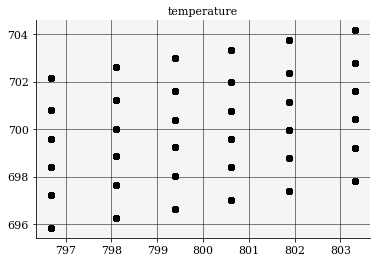

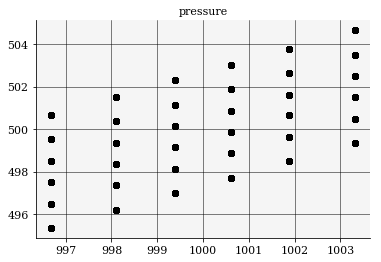

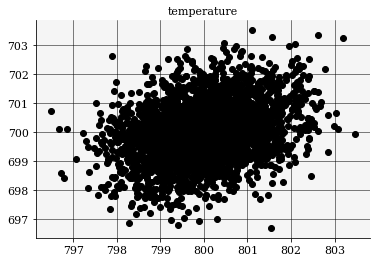

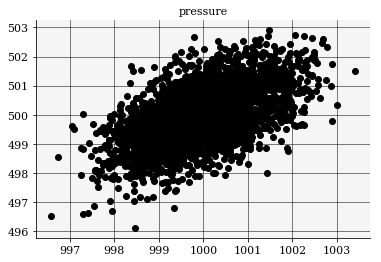

In [4]:
P01   = 1000
P02   = 500
p1 = Parameter(order=5, distribution='truncated-gaussian', shape_parameter_A= P01, shape_parameter_B=1.0, lower = P01*0.90, upper = P01*1.1)
p2 = Parameter(order=5, distribution='truncated-gaussian', shape_parameter_A= P02, shape_parameter_B=1.0, lower = P02*0.90, upper = P02*1.1)

obj = Nataf([t1, t2, p1, p2], R)

pc = obj.U2C(p)
mc_pts = obj.getCorrelatedSamples(N=3000)

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(pc[:,0],pc[:,1],'ko')
plt.title('temperature')
plt.show()

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(pc[:,2],pc[:,3],'ko')
plt.title('pressure')
plt.show()

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(mc_pts[:,0],mc_pts[:,1],'ko')
plt.title('temperature')
plt.show()

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(mc_pts[:,2],mc_pts[:,3],'ko')
plt.title('pressure')
plt.show()

A second test, which aim was to check the influence of the position assumed by the arrays inside the input matrix of Nataf class, has been done: a new instance has been done by switching the position of the temperatures with pressures ($[p1, p2, t1, t2]$) and keeping the original values of mean.
This test has not been reported here because it showed the same results of part 1: so it seems that the real problem of the transformed pressures is inside the mean values that have been set.
